<a href="https://colab.research.google.com/github/Huin9/Huin9/blob/main/Ch01_03_Basic_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Chapter01 - Linear Regression
---
- with Sin function

친숙하게 알고 있는 Sin 그래프를 이용해서  
Linear Regression을 Scikit Learn Library를 이용해 수행해보자

## **Import Library**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## **Prepare simple dataset**

In [ ]:
print(np.pi)

3.141592653589793


In [ ]:
# true data
N = 100
# linspace = 선형구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.
# 시작, 끝(포함), 갯수
# reshpae = 기존 데이터는 유지하고 차원과 형상을 바꿈.
# ex) 3개의 행과 4개의 열로 구성된 배열로 재구성하고 싶으면 reshape(3,4)
# reshape(N,1) = N개 행, 1개 열

# x값은 0/~2*pi 이고
# y값은 -1~1사이의 값
X = np.linspace(0,2*np.pi, N).reshape(N,1)

In [ ]:
X[:5]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955],
       [0.25386607]])

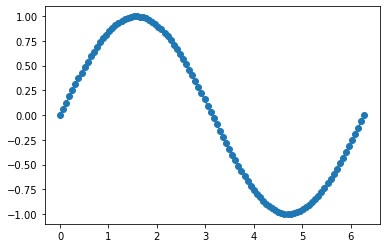

In [ ]:
# plot 그리기
y = np.sin(X)
plt.plot(X,y)
plt.scatter(X,y)

### **Noise 만들어주기**
- rand(0과 1사이의 난수를 발생시키는)명령어를 사용

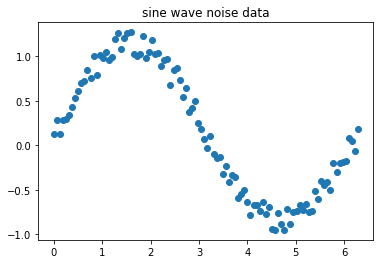

In [ ]:
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X,y)
plt.title("sine wave noise data")
plt.show()

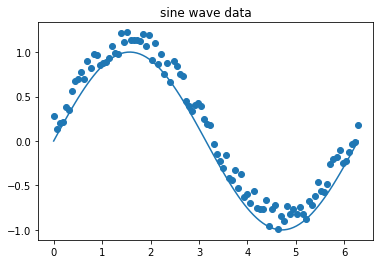

In [ ]:
# 기존 그래프와 함께 plotting

y = np.sin(X)
plt.plot(X,y)

# add noise
np.random.rand(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X,y)
plt.title("sine wave data")
plt.show()

### **Shuffle Dataset**

In [ ]:
# shuffle data
np.random.seed(10)

# N은 100이므로 1~100까지의 수를 섞어준다(permutation(N))
idx = np.random.permutation(N)

In [ ]:
idx

array([19, 14, 43, 37, 66,  3, 79, 41, 38, 68,  2,  1, 60, 53, 95, 74, 92,
       26, 59, 46, 90, 70, 50, 44, 76, 55, 21, 61,  6, 63, 42, 34, 84, 52,
       35, 39, 45,  4,  5, 48, 32, 20, 83, 58, 47, 80, 17, 67, 81,  7, 87,
       97, 98, 99, 24, 10, 96, 86, 56, 71, 23, 22, 91, 94, 18, 27, 88, 57,
       31, 65, 12, 82, 30, 75, 25, 13, 69, 77, 85, 51, 49, 78, 72, 33, 62,
       54, 11, 16, 36, 40,  0, 73,  8, 29, 93, 89, 28, 64, 15,  9])

In [ ]:
shuffle_X = X[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_y[:3])

[[1.20586385]
 [0.88853126]
 [2.72906028]]
[[1.071723  ]
 [0.96409531]
 [0.444598  ]]


### **Split train & test (3:1의 비율)**

In [ ]:
# 3:1의 비율로 train test를 나눔
n = int(N*(3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [ ]:
# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

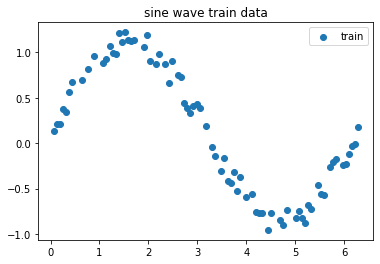

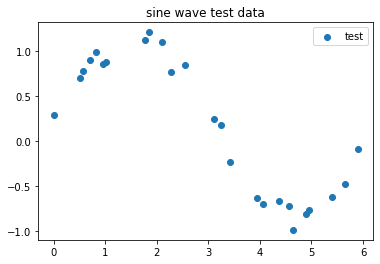

In [ ]:
# plot
plt.scatter(X_train, y_train, label = 'train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label = 'test')
plt.legend()
plt.title('sine wave test data')
plt.show()

## **Perform Linear Regression**
- compute W using sklearn library

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.intercept_) # 절편
print(reg.coef_) # 기울기

[1.03487449]
[[-0.27807301]]


## **Prediction**
- X data를 이용해서 Prediction을 하기 위해서는 .predict를 이용

In [ ]:
Pred = reg.predict(X_train)

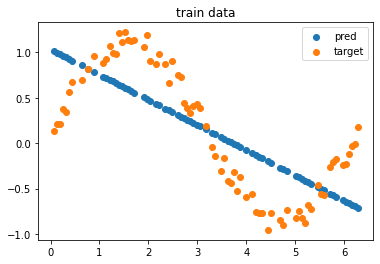

In [ ]:
plt.figure()
plt.scatter(X_train, Pred, label='pred')
plt.scatter(X_train, y_train, label = 'target')
plt.legend()
plt.title('train data')
plt.show()

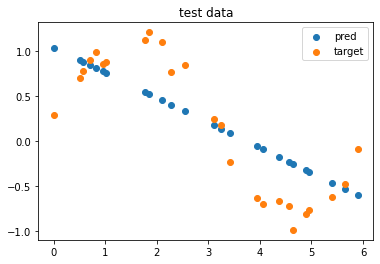

In [ ]:
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label = 'target')
plt.legend()
plt.title('test data')
plt.show()

### **Practice**
- Another Dataset
- 임의의function을 지정한 후 linear regression을 수행

$$y = 2x + 5$$

In [ ]:
X = 3 * np.random.rand(100,1) # shape => (100,1)
y = 2*X + 5

# add_noise
y_noise = y + np.random.rand(100, 1) # noise data를 가진 y값

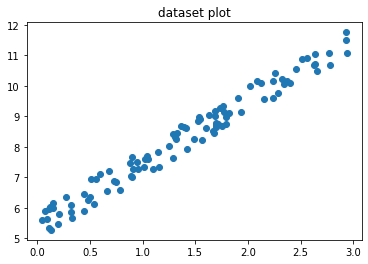

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

In [ ]:
N = 100 
np.random.seed(100)
idx = np.random.permutation(N)

In [ ]:
shuffle_X = X[idx]
shuffle_y = y_noise[idx]

In [ ]:
n = int(N*(3/4))
train_X = shuffle_X[:n]  
train_y = shuffle_y[:n]

test_X = shuffle_X[n:]
test_y = shuffle_y[n:] 

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_X, train_y)

print(reg.intercept_)
print(reg.coef_)

[5.38776526]
[[2.06806603]]


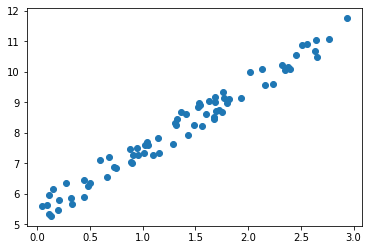

In [ ]:
plt.scatter(train_X, train_y)

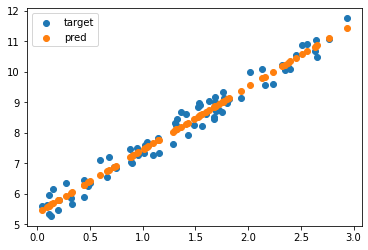

In [ ]:
Pred = reg.predict(train_X)

plt.figure()
plt.scatter(train_X, train_y, label = 'target')
plt.scatter(train_X, Pred, label = 'pred')
plt.legend()
plt.show()

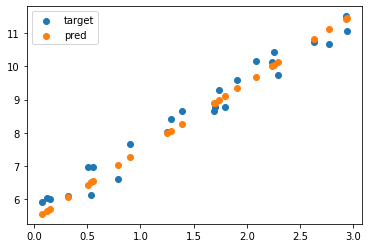

In [ ]:
Pred = reg.predict(test_X)

plt.figure()
plt.scatter(test_X, test_y, label = 'target')
plt.scatter(test_X, Pred, label = 'pred')
plt.legend()
plt.show()

## **Polynomial Regression**

#### **Another Dataset**
$$y = x{^2} +3x + 5$$

In [ ]:
np.random.seed(5)

N = 100
# 기존 x 범위는 0~6 사이였으나 -3이 있으므로 -3~3이 범위로 바뀌게 된다.

X = 6 * np.random.rand(N,1) - 3
y = X**2 + X*3 + 5

noise 추가

In [ ]:
y_noise = y + 3*np.random.rand(N,1)

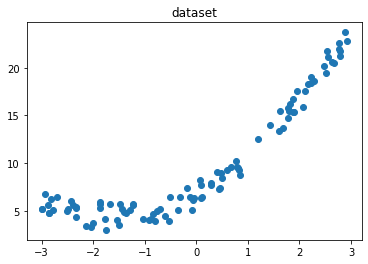

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_ )
print('w1: ', reg.coef_)

w0:  [9.86809285]
w1:  [[2.97610592]]


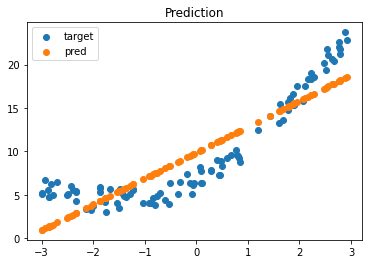

In [ ]:
plt.figure()
plt.scatter(X, y_noise, label ='target')
plt.scatter(X, reg.predict(X), label ='pred')

plt.legend()
plt.title('Prediction')
plt.show()

- 위의 예시에서 보듯, Sin Function 그래프를 1차원 직선으로 나타내기에 무리가 있음.
- X의 feature를 더추가해주어서 좀 더 정확한 Linear Regression을 수행

### 좀 더 자세히 살펴보자

$$y_{1} = w_{1}x_{1} + w_{0}$$

(여기서 $w_{1}$ 은 reg.coef_ 이고 $w_{0}$ 은 reg.intercept_ 로 구했음) <br>
와 같은 간단한 직선 방정식의 형태를 가정하고 풀었던 과정이었다.
***
이것은 우리가 가지고 있는 X 의 feature 가 하나 밖에 있지 않았기 때문이다.<br>
하지만 X 의 feature 를 제곱, 세제곱의 형태로 임의로 늘려준다면 방정식은 1차원의 직선이 아닌, 아래와 같이 고차원의 식으로 변할 수 있다.

$
\begin{align}
y_{1} = w_{n}x_{1}^n + w_{n-1}x_{1}^{n-1} + ... + w_{2}x_{1}^2 + w_{1}x_{1}^1 + w_{0}
\end{align}
$

여기서<br>

${\phi}$ function 을 새로 정의하고 이것이 다음을 나타 낼 때,

$
\begin{align}
{\phi}_{n}(x) = x^n
\end{align}
$

주어진 식은 다음과 같이 다시 쓸 수 있다.<br>

$
\begin{align}
y_{1} = w_{n}{\phi}_{n}(x_{1}) + w_{n-1}{\phi}_{n-1}(x_{1}) + ... + w_{2}{\phi}_{2}(x_{1}) + w_{1}{\phi}_{1}(x_{1}) + w_{0}{\phi}_{0}(x_{1})
\end{align}
$
***
즉, 기존의 X 를 제곱, 세제곱의 형태를 만들어서 feature 를 추가해준다면, 좀 더 정확한 Model 을 얻게 될 것이다.


### **Library**를 이용해서 feature를 추가해보자

Feature를 추가할 때는 PolynomialFeatures를 사용  
제곱,세제곱 등의 계산이 가능

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# transfrom from (x) to (1,x,x^2) ## default
polynomial = PolynomialFeatures(degree=2, include_bias='default')
new_feature = polynomial.fit_transform(X)
print(new_feature[:2])
# transform from (x) to (x, x^2) ## include_bias = False

polynomial = PolynomialFeatures(degree=2, include_bias=False)
new_feature = polynomial.fit_transform(X)
print(new_feature[:2])

[[1.         0.         0.        ]
 [1.         0.06346652 0.004028  ]]
[[0.         0.        ]
 [0.06346652 0.004028  ]]


In [ ]:
print("기존의 X[0]: ", X[0])
print("Feature가 추가된 X[0]:" , new_feature[0])

기존의 X[0]:  [-1.66804097]
Feature가 추가된 X[0]: [-1.66804097  2.78236069]


In [ ]:
print((-1.66804097)**2)

2.782360677598541


### **Feature를 추가한 상태에서 LinearRegression을 다시 사용**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature, y_noise)

print('w0:', reg.intercept_)
print('w1:', reg.coef_)

w0: [6.82439098]
w1: [[3.02103818 0.92278965]]


$$y = x{^2} +3x + 5 $$

$$y = 0.92x{^2} + 3.02x + 6.82 $$


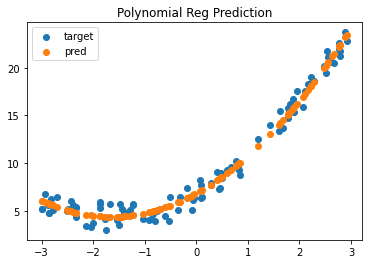

In [ ]:
plt.figure()
plt.scatter(X, y_noise, label ='target')
plt.scatter(X, reg.predict(new_feature), label = 'pred')

plt.legend()
plt.title("Polynomial Reg Prediction")
plt.show()

# **Practice1**

## **Polynomial Regression**

x의 범위는 -2~2

$$ y = 3x{^3} + 2x{^2}+ 7x + 5$$

In [ ]:
np.random.seed(10)

N = 100
X = 4 * np.random.rand(N, 1)-2 #-2~2로 범위를 만들기 위해
y = 3*X**3 + 2*X**2 + 7*X + 5

y_noise = y + 10*np.random.rand(N,1)

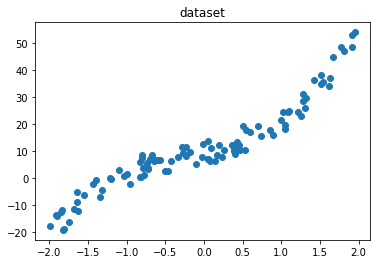

In [ ]:
plt.scatter(X, y_noise)
plt.title("dataset")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Polynomial = PolynomialFeatures(degree=3, include_bias= True)
new_feature = Polynomial.fit_transform(X)
new_feature[0]

array([1.        , 1.08528257, 1.17783826, 1.27828734])

In [ ]:
reg = LinearRegression()
reg.fit(new_feature, y_noise)

print(reg.intercept_)
print(reg.coef_)

[9.18157997]
[[0.         6.35064075 2.3300474  3.20666863]]


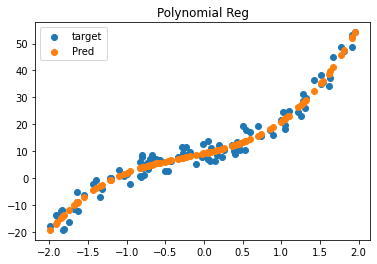

In [ ]:
plt.figure()
plt.scatter(X, y_noise, label = 'target')
plt.scatter(X, reg.predict(new_feature),label = 'Pred')

plt.legend()
plt.title("Polynomial Reg")
plt.show()

$$ {y = 3x^3 + 2x^2 + 7x + 1} $$
$$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $$

# **Practice 2**

- 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자


In [ ]:
N = 100
X = np.linspace(0, 2*np.pi, N).reshape(N,1)

y = np.sin(X)
y += 0.3*np.random.rand(N,1)

In [ ]:
polynomial = PolynomialFeatures(degree = 3, include_bias=False)
sin_new_feature = polynomial.fit_transform(X)

In [ ]:
print("기존의 X[0]: ", X[1])
print("Feature가 추가된 X[0]: ", sin_new_feature[1])

기존의 X[0]:  [0.06346652]
Feature가 추가된 X[0]:  [0.06346652 0.004028   0.00025564]


### **Shuffle & Split train, test**

In [ ]:
# shuffle data
idx = np.random.permutation(N)

shuffle_X = sin_new_feature[idx]
shuffle_y = y[idx]

In [ ]:
# Split data
n = int(N*(4/5))

train_X = shuffle_X[:n]
train_y = shuffle_y[:n]

test_X = shuffle_X[n:]
test_y = shuffle_y[n:]

In [ ]:
# LinearRegression
reg = LinearRegression()
reg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.intercept_)
print(reg.coef_)

[0.00796539]
[[ 1.90199565 -0.89455918  0.09607846]]


In [ ]:
Pred = reg.predict(train_X)

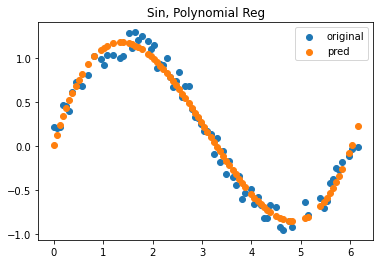

In [ ]:
plt.figure()
plt.scatter(train_X[:,0], train_y, label = "original")
plt.scatter(train_X[:,0], Pred, label = "prediction")

plt.legend()
plt.title("Sin, Polynomial Reg")
plt.show()

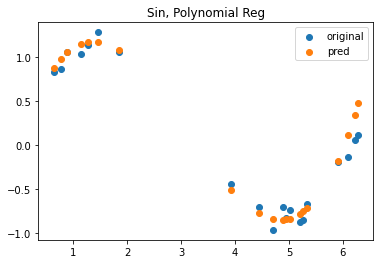

In [ ]:
Pred = reg.predict(test_X)

plt.figure()
plt.scatter(test_X[:,0], test_y, label = "original")
plt.scatter(test_X[:,0], Pred, label = "prediction")

plt.legend()
plt.title("Sin, Polynomial Reg")
plt.show()

### **Train, Test data로 plot**

In [ ]:
X_all = shuffle_X
y_all = shuffle_y

all_Pred = reg.predict(X_all)

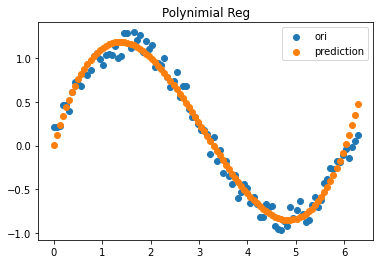

In [ ]:
plt.figure()
plt.scatter(X_all[:,0], y_all, label = 'ori')
plt.scatter(X_all[:,0], all_Pred, label = "prediction")

plt.legend()
plt.title('Polynimial Reg')
plt.show()